<a href="https://colab.research.google.com/github/tempzeba/iot_test_public/blob/main/A1L02001_log_20201119_(DNN_tensorflow2_0)_Sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0) 程式說明
### 目的：A1L02001 IOT異常分析
### 運行環境：

In [2]:
import sys
print("python版本:%s"% sys.version)

python版本:3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]


In [ ]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

## 1) 載入資料集

In [ ]:
# df_train = pd.read_csv('./data/Iris.csv')
df_train = pd.read_csv('https://github.com/tempzeba/iot_test_public/releases/download/iot_data/A1L02001_log_01.csv', sep='\t')
df_train = df_train.drop(labels=[r'收集日期', 
r'抽樣秒', 
r'位址區段E32768紀錄時間', 
r'位址區段G32768紀錄時間', 
r'位址區段G12288紀錄時間',
r'機台編號',
r'目前生產配方'
,
 '壓力檢測啟動',
 'Cycle_Time',
 '第一穴預吹延遲',
 '第二穴預吹延遲',
 '第三穴預吹延遲',
 '第四穴預吹延遲',
 '第五穴預吹延遲',
 '第六穴預吹延遲',
 '第七穴預吹延遲',
 '第八穴預吹延遲',
 '第九穴預吹延遲',
 '第十穴預吹延遲',
 '第一穴高壓延遲',
 '第二穴高壓延遲',
 '第三穴高壓延遲',
 '第四穴高壓延遲',
 '第五穴高壓延遲',
 '第六穴高壓延遲',
 '第七穴高壓延遲',
 '第八穴高壓延遲',
 '第九穴高壓延遲',
 '第十穴高壓延遲',
 '第一穴吹高壓時間',
 '第二穴吹高壓時間',
 '第三穴吹高壓時間',
 '第四穴吹高壓時間',
 '第五穴吹高壓時間',
 '第六穴吹高壓時間',
 '第七穴吹高壓時間',
 '第八穴吹高壓時間',
 '第九穴吹高壓時間',
 '第十穴吹高壓時間',
 '第一穴排氣時間',
 '第二穴排氣時間',
 '第三穴排氣時間',
 '第四穴排氣時間',
 '第五穴排氣時間',
 '第六穴排氣時間',
 '第七穴排氣時間',
 '第八穴排氣時間',
 '第九穴排氣時間',
 '第十穴排氣時間',
 '第九層燈管加熱%',
 '第十層燈管加熱%',
 '產能',
 '吹氣鼓風機轉速',
 '吸氣鼓風機轉速',
 '自轉馬達轉速',
 '整列滾筒調速',
 '牙口鼓風機轉速',
 '入胚啟動位置',
 '入胚啟動延時',
 '震動馬達震動時間',
 '震動馬達震動循環時間',
 '第九穴壓力檢測',
 '第十穴壓力檢測',
 '破瓶數增加',
 '入胚啟動',
 '加熱啟動',
 '吹瓶啟動',
 '機台異常或無異常',
 '自動或手動',
 '總生產數量',
 '機台是否正常(0~59s)'

],axis=1) # 移除Id
# df_train = pd.read_csv('https://github.com/tempzeba/iris-dnn-tensorflow/raw/master/data/Iris.csv')
# df_train = df_train.drop(labels=['Id'],axis=1) # 移除Id
mask = df_train[r'異常代碼'] > 0
target_count = mask.sum()
df_train_noerr = df_train[df_train[r'異常代碼'] == 0].sample(n=target_count,random_state=123,axis=0)
df_train = df_train[mask]
df_train = df_train.append(df_train_noerr)
df_train.count()

低壓壓力         17460
高壓壓力         17460
回收壓力         17460
預吹壓力         17460
最多成型時間       17460
第一層燈管加熱%     17460
第二層燈管加熱%     17460
第三層燈管加熱%     17460
第四層燈管加熱%     17460
第五層燈管加熱%     17460
第六層燈管加熱%     17460
第七層燈管加熱%     17460
第八層燈管加熱%     17460
滾筒速度         17460
第一穴壓力檢測      17460
第二穴壓力檢測      17460
第三穴壓力檢測      17460
第四穴壓力檢測      17460
第五穴壓力檢測      17460
第六穴壓力檢測      17460
第七穴壓力檢測      17460
第八穴壓力檢測      17460
破瓶壓力檢測值設定    17460
加熱箱一水道溫度     17460
加熱箱二水道溫度     17460
加熱箱三水道溫度     17460
加熱箱四水道溫度     17460
加熱箱五水道溫度     17460
加熱箱六水道溫度     17460
加熱箱七水道溫度     17460
加熱箱八水道溫度     17460
破瓶數量         17460
異常代碼         17460
dtype: int64

## 2) 手動編碼
處理名目資料 (Nominal variables) - 資料前處理
依據特徵資料的特性，可以選擇手動編碼或自動編碼。

### 使用編碼時機?
進行深度學習時，神經網路只能處理數值資料。因此我們需要將所有非數字型態的特徵進行轉換。

### 註：
略。(IOT原始資料已經一次前處理)

## 3) 檢查缺失值
使用 numpy 所提供的函式來檢查是否有 NA 缺失值，假設有缺失值使用dropna()來移除。使用的時機在於當只有少量的缺失值適用，若遇到有大量缺失值的情況，或是本身的資料量就很少的情況下建議可以透過機器學習的方法補值來預測缺失值。
### 註：
略。(IOT原始資料已經一次前處理)

## 4) 將輸出特徵做one-hot encoding
如何對欄位class做one-hot encoding？

In [ ]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(df_train[r'異常代碼'])
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## 5) 切割訓練集與測試集

In [ ]:
pd.set_option('max_row',300)
# X=df_train.drop(labels=['Class'],axis=1)
X=df_train.drop(columns=[r'異常代碼'])
# X.isna().sum().sum()
# X
mask = X.describe().transpose()['std']==0
X.describe().transpose()[mask].index.tolist()
# X.describe().transpose().columns.tolist()


[]

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=.3 , random_state=40)

In [ ]:
print('訓練資料: ',X_train.shape)
print('測試資料: ',X_test.shape)
X_train

訓練資料:  (12222, 32)
測試資料:  (5238, 32)


,低壓壓力,高壓壓力,回收壓力,預吹壓力,最多成型時間,第一層燈管加熱%,第二層燈管加熱%,第三層燈管加熱%,第四層燈管加熱%,第五層燈管加熱%,第六層燈管加熱%,第七層燈管加熱%,第八層燈管加熱%,滾筒速度,第一穴壓力檢測,第二穴壓力檢測,第三穴壓力檢測,第四穴壓力檢測,第五穴壓力檢測,第六穴壓力檢測,第七穴壓力檢測,第八穴壓力檢測,破瓶壓力檢測值設定,加熱箱一水道溫度,加熱箱二水道溫度,加熱箱三水道溫度,加熱箱四水道溫度,加熱箱五水道溫度,加熱箱六水道溫度,加熱箱七水道溫度,加熱箱八水道溫度,破瓶數量
31881,8.0,32.9,10.9,10.7,945.0,69.0,41.0,40.0,40.0,45.0,67.0,45.5,40.0,35.0,28.4,28.5,28.5,28.6,28.1,28.1,28.1,28.1,22.0,62.6,63.3,68.5,66.1,55.0,75.4,68.7,63.5,1261.0
36099,8.3,31.3,11.4,11.3,942.0,68.5,41.0,40.0,40.0,45.0,69.0,45.0,40.0,35.0,27.7,27.8,27.7,27.8,27.4,27.4,27.4,27.4,22.0,41.6,44.3,45.4,44.6,38.3,47.4,43.8,42.0,1261.0
35910,8.2,33.4,11.2,11.1,942.0,68.5,41.0,40.0,40.0,45.0,69.0,45.0,40.0,35.0,27.7,27.8,27.7,27.8,27.4,27.4,27.4,27.4,22.0,47.9,48.1,50.1,49.3,40.9,54.1,52.0,46.6,1261.0
90214,8.3,29.0,10.7,10.2,939.0,68.0,40.5,40.0,40.0,46.5,66.5,47.0,38.0,35.0,28.4,28.4,28.4,28.6,28.1,28.1,28.1,28.1,24.0,61.4,61.6,66.1,65.2,56.1,74.1,66.3,61.3,1306.0
12491,8.2,31.4,12.0,11.9,945.0,71.0,41.0,40.0,40.0,45.0,67.5,47.5,40.0,35.0,31.1,31.1,31.0,31.2,0.0,0.0,0.0,0.0,22.0,40.9,42.6,44.4,43.7,37.4,46.0,42.8,41.6,1259.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18789,8.4,27.8,10.9,10.5,942.0,70.0,41.0,40.0,40.0,45.0,68.0,46.0,40.0,35.0,26.7,26.6,26.6,26.7,26.4,26.3,26.3,26.4,22.0,62.8,63.1,68.8,66.8,57.2,77.7,67.9,62.8,1260.0
6163,8.0,31.6,12.1,11.8,942.0,70.0,41.0,40.0,40.0,45.0,67.5,47.0,40.0,35.0,27.7,27.6,27.6,27.8,27.3,27.3,27.3,27.3,22.0,61.4,61.1,66.8,64.5,56.1,75.9,66.3,61.9,1259.0
53210,8.2,27.6,10.1,9.7,942.0,68.5,41.0,40.0,40.0,46.0,66.5,49.0,39.0,35.0,27.3,27.2,27.3,27.4,27.0,26.9,26.9,26.9,23.0,61.8,62.6,67.9,65.4,55.1,77.8,68.8,61.9,1297.0
80469,8.3,28.8,10.6,10.2,942.0,68.5,41.0,40.0,40.0,45.0,65.5,49.0,38.0,35.0,27.8,27.8,27.8,27.9,27.5,27.4,27.5,27.5,24.0,61.9,62.4,66.5,65.3,55.4,75.2,65.3,61.3,1305.0


## 6) 建立網路模型

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2.3.0


In [ ]:
# 此範例使用 Tensorflow2.0 Sequential API 搭建神經網路。
model = Sequential()
model.add(Dense(8, Activation('relu'), input_dim=X.shape[-1]))
model.add(Dense(16, Activation('relu')))
model.add(Dense(193, Activation('softmax')))

In [ ]:
model.summary()   # Weights = (4+1)*8+(8+1)*16+(16+1)*3

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_19 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_20 (Dense)             (None, 193)               3281      
Total params: 3,689
Trainable params: 3,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 編譯模型
optim = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['acc'])

batch_size=1000
epochs = 20

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)


Epoch 1/20
6/6 [==============================] - 0s 38ms/step - loss: 0.4270 - acc: 0.8714 - val_loss: 0.4237 - val_acc: 0.8765
Epoch 2/20
6/6 [==============================] - 0s 11ms/step - loss: 0.3908 - acc: 0.8773 - val_loss: 0.4023 - val_acc: 0.8790
Epoch 3/20
6/6 [==============================] - 0s 10ms/step - loss: 0.3893 - acc: 0.8804 - val_loss: 0.3861 - val_acc: 0.8774
Epoch 4/20
6/6 [==============================] - 0s 10ms/step - loss: 0.3756 - acc: 0.8812 - val_loss: 0.3766 - val_acc: 0.8823
Epoch 5/20
6/6 [==============================] - 0s 10ms/step - loss: 0.3705 - acc: 0.8844 - val_loss: 0.3829 - val_acc: 0.8823
Epoch 6/20
6/6 [==============================] - 0s 11ms/step - loss: 0.3706 - acc: 0.8828 - val_loss: 0.3733 - val_acc: 0.8839
Epoch 7/20
6/6 [==============================] - 0s 10ms/step - loss: 0.3668 - acc: 0.8832 - val_loss: 0.3722 - val_acc: 0.8880
Epoch 8/20
6/6 [==============================] - 0s 10ms/step - loss: 0.3664 - acc: 0.8844 - val

## 7) 觀察訓練結果

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs_ = range(1,len(acc)+1)

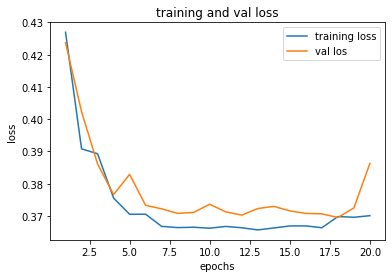

In [ ]:
plt.plot(epochs_ , loss , label = 'training loss')
plt.plot(epochs_ , val_loss , label = 'val los')
plt.title('training and val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

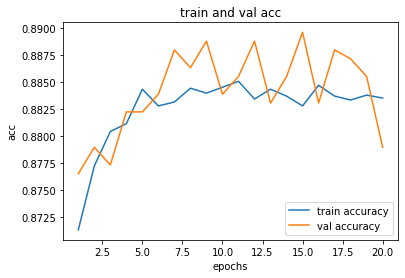

In [ ]:
plt.clf()
plt.plot(epochs_ , acc , label='train accuracy')
plt.plot(epochs_ , val_acc , label = 'val accuracy')
plt.title('train and val acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

## 8) 測試

In [ ]:
from sklearn.metrics import accuracy_score
label=np.argmax(y,axis=1)
pred =  np.argmax(model.predict(X), axis=1)
print(pred.shape)
print(accuracy_score(label, pred))
print(y)

(17460,)
0.8800687285223368
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [ ]:
from numpy import *
a = array([[1, 3], [2, 4], [5, 6]])
print(a.shape)

(3, 2)


In [ ]:
# !pip install eli5

## 9) 檢查特徵重要性
> https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html
> https://www.mdeditor.tw/pl/pgi5/zh-tw

> 針對BlackBox模型或非sklearn模型，使用排列重要性方法


> 捨棄重要性低、增加損失的features特徵，重新建模訓練。


> 














In [ ]:


# import numpy as np
from eli5.permutation_importance import get_score_importances

# ... load data, define score function
def score(X, y):
    y_pred = np.argmax(model.predict(X), axis=1)
    return accuracy_score(y, y_pred)

lab=np.argmax(y_train,axis=1)
base_score, score_decreases = get_score_importances(score, X_train.values, lab)
feature_importances = np.mean(score_decreases, axis=0)



In [ ]:
# print(feature_importances)
feature_importance_dict = {}
for i, feature_name in enumerate(X.columns.values.tolist()) :
	feature_importance_dict[feature_name]=feature_importances[i]

# print(dict(sorted(feature_importance_dict.items(), key=lambda x:x[1],reverse=True)[:5]))
sorted_fi = dict(sorted(feature_importance_dict.items(), key=lambda x:x[1],reverse=True))
for name,i in sorted_fi.items():
  print(name, i)

第八穴壓力檢測 0.15195549009982
加熱箱七水道溫度 0.14473899525445916
加熱箱四水道溫度 0.06138111602029128
第五穴壓力檢測 0.06000654557355589
破瓶數量 0.032236949762722955
第一穴壓力檢測 0.025969563082965164
加熱箱一水道溫度 0.022942235313369343
第七穴壓力檢測 0.021109474717722086
加熱箱三水道溫度 0.018245786287023336
加熱箱二水道溫度 0.01739486172475857
滾筒速度 0.014923907707412809
加熱箱八水道溫度 0.013745704467353903
加熱箱五水道溫度 0.011160202912780193
第二穴壓力檢測 0.007363770250368162
第三穴壓力檢測 0.006774668630338709
加熱箱六水道溫度 0.005236458844706249
第六穴壓力檢測 0.0028473244968090228
第四穴壓力檢測 0.001800032727867773
第一層燈管加熱% 0.0003436426116838476
第八層燈管加熱% 0.0002945508100147265
第七層燈管加熱% 0.0002454590083456054
破瓶壓力檢測值設定 0.00022909507445589838
高壓壓力 -3.2727867779414055e-05
第二層燈管加熱% -0.00013091147111765622
第五層燈管加熱% -0.00014727540500736325
低壓壓力 -0.0001800032727867773
回收壓力 -0.00022909507445589838
第三層燈管加熱% -0.0002454590083456054
第四層燈管加熱% -0.0002454590083456054
第六層燈管加熱% -0.00027818687612501947
預吹壓力 -0.0004745540828015038
最多成型時間 -0.0013745704467353903


In [ ]:
# 

In [ ]:
# 